In [1]:
#e-mail:john791016@gmail.com

In [2]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.reset_default_graph()                                 #確保每次都是重新使用新的 graph

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

#layers
x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,32,[5,5],padding='VALID') #VALID指的就是沒有額外鋪上0的邊界的情形，
pool_1 = slim.max_pool2d(hidden_1,[2,2])                 #SAME則是額外鋪上0的邊界，並且使得輸出的維度和輸入一樣。
hidden_2 = slim.conv2d(pool_1,64,[3,3],padding='VALID')
pool_2 = slim.max_pool2d(hidden_2,[2,2])
#hidden_3 = slim.conv2d(pool_2,20,[5,5])                 #you can add more layers here
#hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(pool_2),10,activation_fn=tf.nn.softmax)


cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()                 #把沒有載入的變量先初始化
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.25})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy: %g"%(i, trainAccuracy))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 100, training accuracy: 0.62
step 200, training accuracy: 0.74
step 300, training accuracy: 0.86
step 400, training accuracy: 0.88
step 500, training accuracy: 0.9
step 600, training accuracy: 0.9
step 700, training accuracy: 0.86
step 800, training accuracy: 0.92
step 900, training accuracy: 0.9
step 1000, training accuracy: 0.94


In [3]:
#test set accuracy
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy: %g"%(testAccuracy))

test accuracy: 0.9389


In [4]:
#get the weight in hidden layers
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})  
    plotNNFilter(units)
    return units.shape
    
#plot hidden layers
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

image shape: (28, 28)


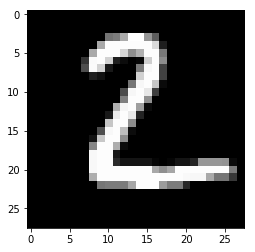

In [5]:
imageToUse = mnist.test.images[1]    
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")
print('image shape:',np.reshape(imageToUse,[28,28]).shape)

shape of hidden_1: (1, 24, 24, 32)


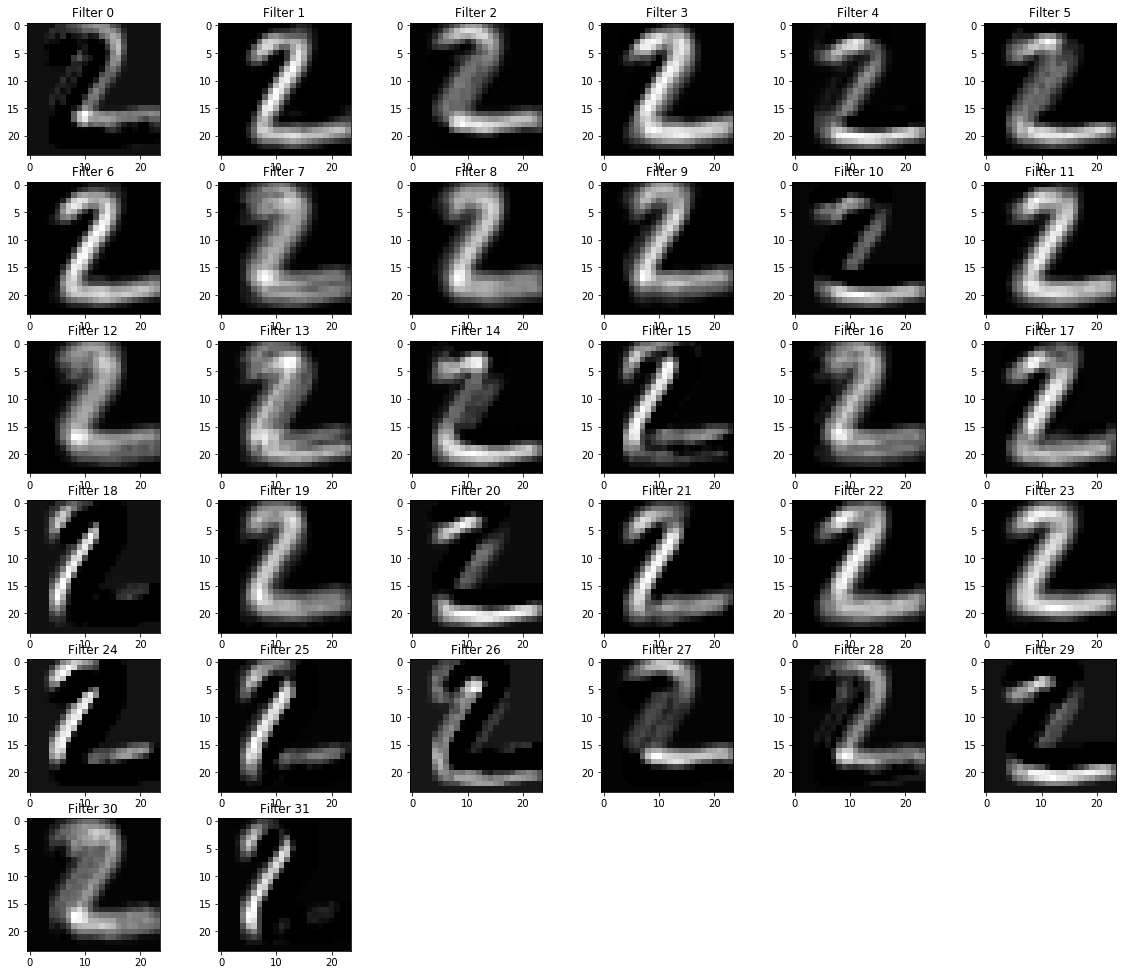

In [6]:
#feature_maps=[]
layer_shape=getActivations(hidden_1,imageToUse)
print('shape of hidden_1:',layer_shape)

shape of pool_1: (1, 12, 12, 32)


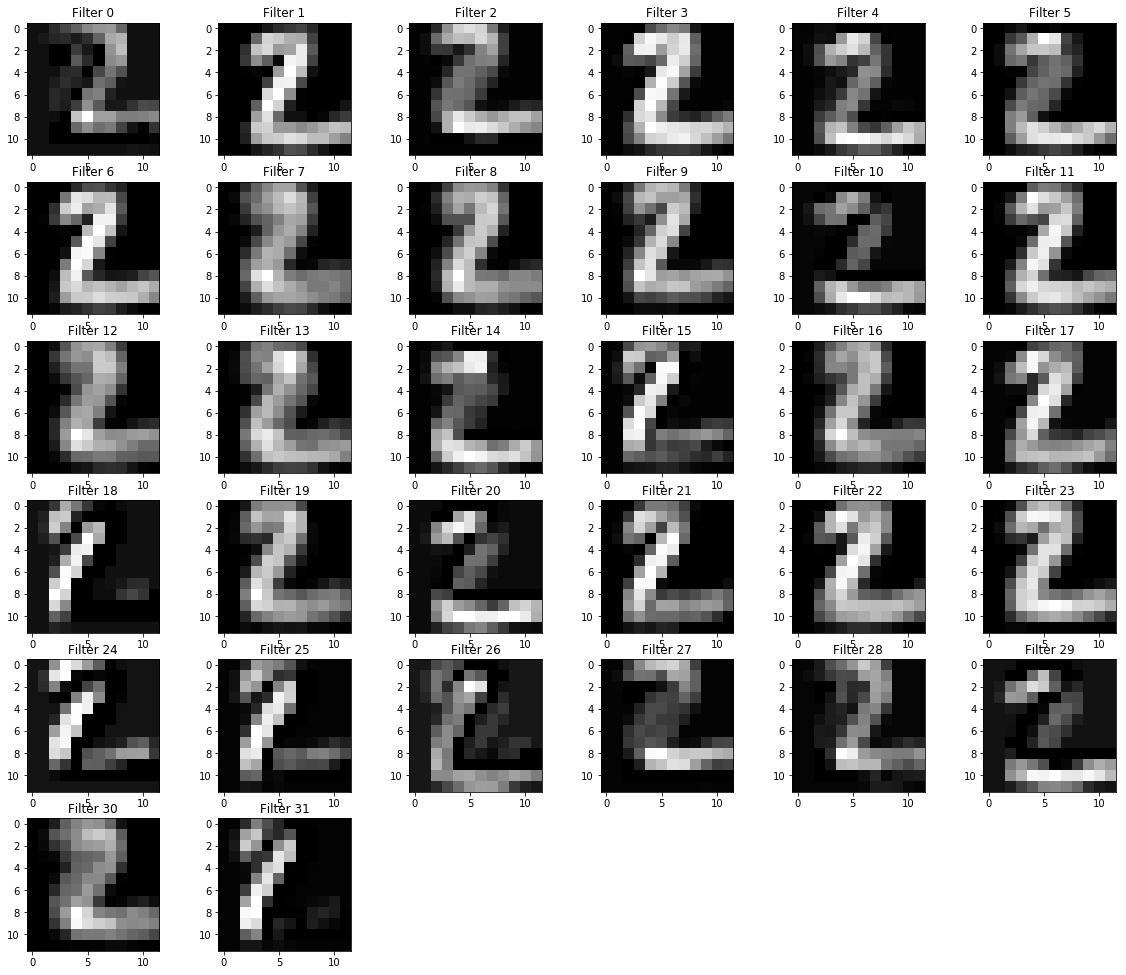

In [7]:
feature_maps=[]
layer_shape=getActivations(pool_1,imageToUse)
print('shape of pool_1:',layer_shape)

shape of hidden_2: (1, 10, 10, 64)


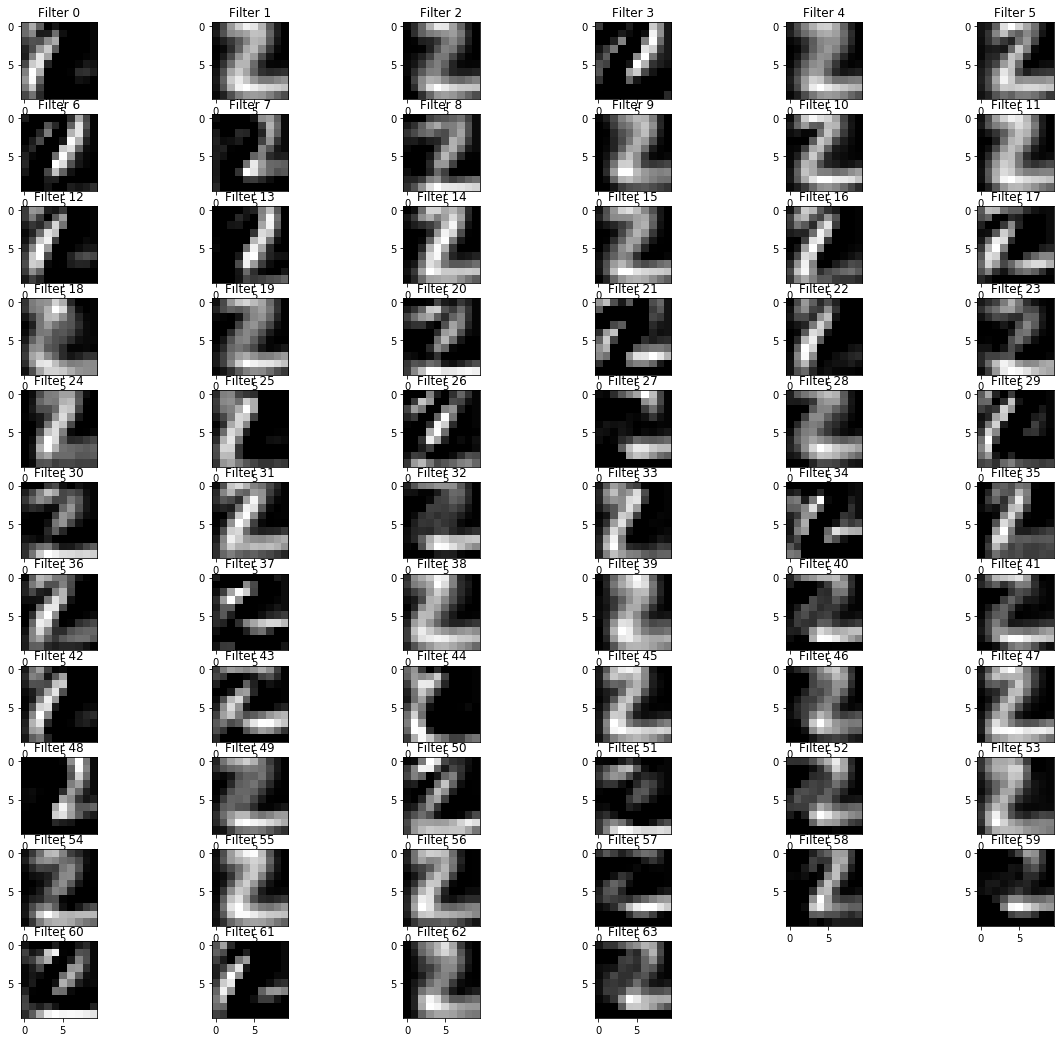

In [8]:
feature_maps=[]
layer_shape=getActivations(hidden_2,imageToUse)
print('shape of hidden_2:',layer_shape)

shape of pool_2: (1, 5, 5, 64)


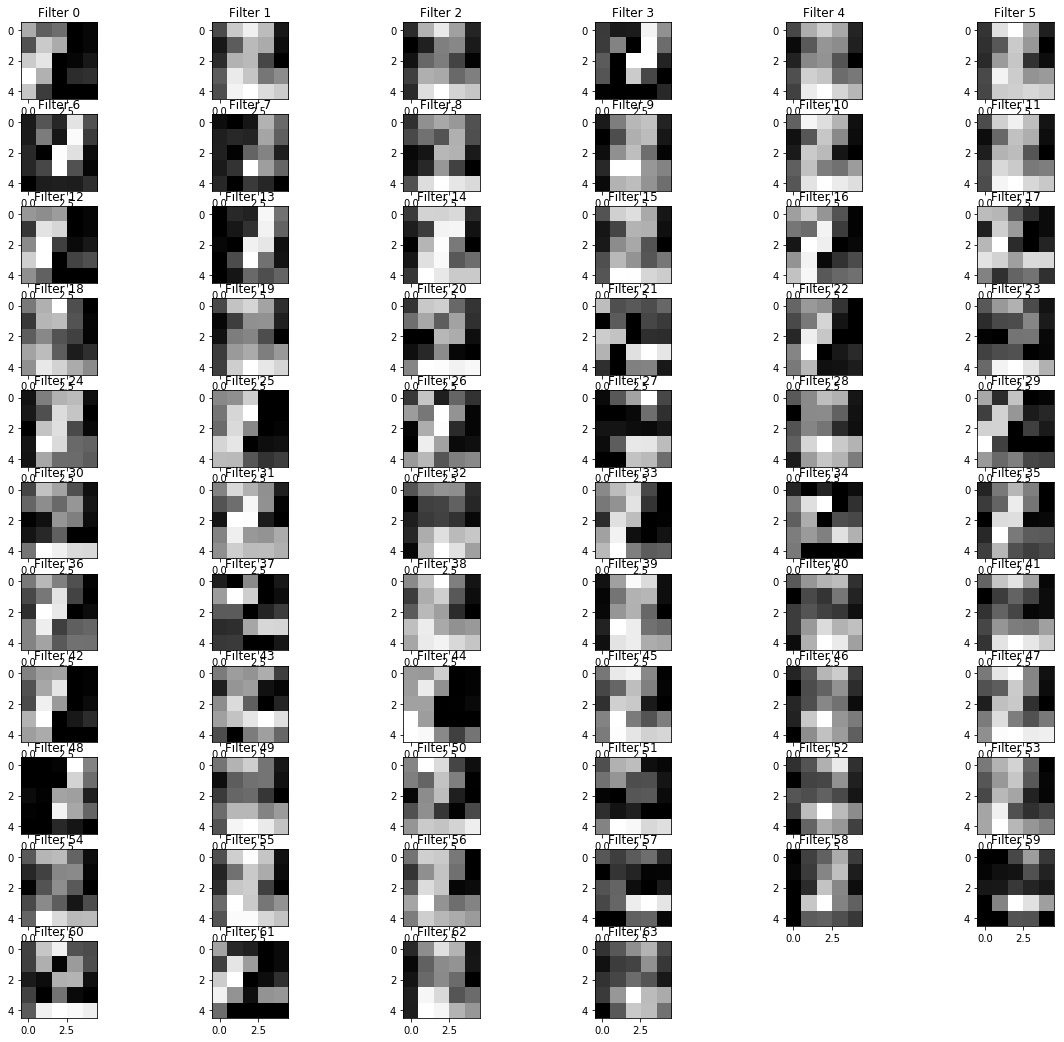

In [9]:
feature_maps=[]
layer_shape=getActivations(pool_2,imageToUse)
print('shape of pool_2:',layer_shape)